___

<h1 align="center" style=font-size:52px>Demonstration of MATE and COCOA for Data Discovery</h1>
<h1 align="center" style=font-size:22px></h1>

___

<p align="center" style=padding:50px>
  <img src="datalake_indexes_qr.png" width=160px/>
</p>

___

## Google Colab Setup

Run this cell to setup the Google Colab environment for the demo.

In [ ]:
%cd /content
! git clone https://github.com/LUH-DBS/datalake_indexes
%cd datalake_indexes
! git pull
%pip install .

## General Setup
Now, we select one of the following datalakes for the demonstration:
- GitTables
- DWTC
- German Open Data

By removing the comment, we initialize a demo instance with the given data lake.

In [ ]:
from maco.demo.datalake_indexes_demo import DatalakeIndexesDemo
import pandas as pd
from IPython.display import display, HTML

demo = DatalakeIndexesDemo("gittables")
# demo = DatalakeIndexesDemo("webtable")
# demo = DatalakeIndexesDemo("open_data")

In [ ]:
%cd /content
! git clone https://github.com/LUH-DBS/datalake_indexes
%cd datalake_indexes
! git pull
%pip install .

## General Setup
Now, we select one of the following datalakes for the demonstration:
- GitTables
- DWTC
- German Open Data

By removing the comment, we initialize a demo instance with the given data lake.

In [10]:
from maco.demo.datalake_indexes_demo import DatalakeIndexesDemo
import pandas as pd
from IPython.display import display, HTML

demo = DatalakeIndexesDemo("gittables")
# demo = DatalakeIndexesDemo("webtable")
# demo = DatalakeIndexesDemo("open_data")

___

# 1) Input Preparation

___

## Reading the input dataset

___

In [8]:
demo.read_input("./datasets/movie.csv")

Shape: (5000, 3)


,Movie Title,Director Name,IMDB Score
0,Unleashed,Louis Leterrier,7.0
1,Vaalu,Vijay Chandar,5.1
2,The Da Vinci Code,Ron Howard,6.6
3,Midnight in Paris,Woody Allen,7.7
4,Why Did I Get Married Too?,Tyler Perry,4.4


___

## Selecting the query and target columns for the joinability discovery

___

,Movie Title,Director Name,IMDB Score
0,Unleashed,Louis Leterrier,7.0
1,Vaalu,Vijay Chandar,5.1
2,The Da Vinci Code,Ron Howard,6.6
3,Midnight in Paris,Woody Allen,7.7
4,Why Did I Get Married Too?,Tyler Perry,4.4


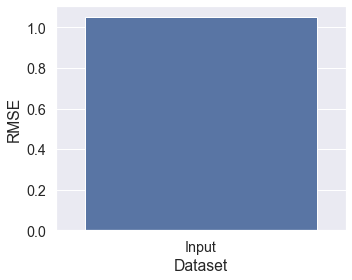

In [9]:
demo.set_query_columns(["Director Name", "Movie Title"])
demo.set_target_column("IMDB Score")

demo.fit_and_evaluate_model(only_input=True)

___

# 2) Joinability Discovery

___

## Finding the top-20 joinable tables using the Super Key Index and MATE

___

In [4]:
demo.joinability_discovery(k=20, k_c=5000, verbose=True)

Preparing input dataset...
Done.
Fetching joinable tables based on first query column...
Done.
Running hash-based row filtering...


  0%|          | 0/5000 [00:00<?, ?it/s]

Done.
Generating join maps...
Done.
--------------------------------------------
Runtime:
--------------------------------------------
Fetching candidate tables: 0.07s
MATE filtering:            11.08s
Fetching row values:       9.81s

--------------------------------------------
Statistics:
--------------------------------------------
Hash-based filtered rows:  114062
Hash-based approved rows:  25814
Matching rows:             24889
FP rows:                   925
Precision:                 0.964


___

## Inspecting the joinability scores for the retrieved joinable tables

___

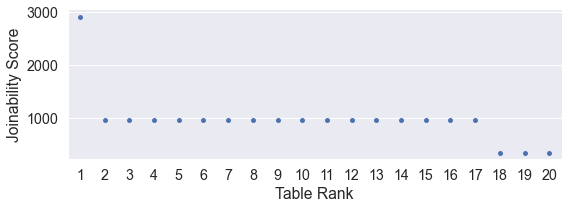

In [5]:
demo.plot_joinability_scores()

___

## Inspecting the joinable table with rank #1

___

In [6]:
demo.display_joinable_table(1)

Joinability score: 2914 
Table ID: 1003141 
#rows: 3000 
#columns: 28 


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,color,james cameron,723,178,0,855,joel david moore,1000,760505847,action adventure fantasy sci fi,cch pounder,avatar,886204,4834,wes studi,0,avatar future marine native paraplegic,http www imdb com title tt0499549 ref fn tt tt 1,3054,english,usa,pg 13,237000000,2009,936,7 9,1 78,33000
1,color,gore verbinski,302,169,563,1000,orlando bloom,40000,309404152,action adventure fantasy,johnny depp,pirates caribbean world s end,471220,48350,jack davenport,0,goddess marriage ceremony marriage proposal pirate singapore,http www imdb com title tt0449088 ref fn tt tt 1,1238,english,usa,pg 13,300000000,2007,5000,7 1,2 35,0
2,color,sam mendes,602,148,0,161,rory kinnear,11000,200074175,action adventure thriller,christoph waltz,spectre,275868,11700,stephanie sigman,1,bomb espionage sequel spy terrorist,http www imdb com title tt2379713 ref fn tt tt 1,994,english,uk,pg 13,245000000,2015,393,6 8,2 35,85000
3,color,christopher nolan,813,164,22000,23000,christian bale,27000,448130642,action thriller,tom hardy,dark knight rises,1144337,106759,joseph gordon levitt,0,deception imprisonment lawlessness police officer terrorist plot,http www imdb com title tt1345836 ref fn tt tt 1,2701,english,usa,pg 13,250000000,2012,23000,8 5,2 35,164000
4,color,andrew stanton,462,132,475,530,samantha morton,640,73058679,action adventure sci fi,daryl sabara,john carter,212204,1873,polly walker,1,alien american civil war male nipple mars princess,http www imdb com title tt0401729 ref fn tt tt 1,738,english,usa,pg 13,263700000,2012,632,6 6,2 35,24000


___

# 3) Duplicate Detection using XASH

___

## Discovering duplicate tables and their relationship within the joinable tables
___

In [7]:
demo.duplicate_detection().show("nb.html")

___

## Removing duplicates within the top joinable tables

___

In [8]:
demo.remove_duplicates()

Reduced the number of joinable tables from 20 to 17.


___

# 4) Correlation Calculation

___

## Obtaining the top-10 correlating features using the Order Index and COCOA

___

In [9]:
demo.correlation_calculation()

  0%|          | 0/17 [00:00<?, ?it/s]

--------------------------------------------
Runtime:
--------------------------------------------
Total runtime: 1.06s
Preparation runtime: 0.91s
Correlation calculation runtime: 0.15s

--------------------------------------------
Statistics:
--------------------------------------------
Evaluated features: 83
Max. correlation coefficient: 0.3518


___

## Inspecting the correlation coefficients for the retrieved features

___

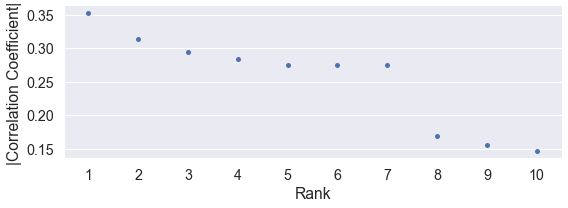

In [10]:
demo.plot_correlation_coefficients()

___

## Materializing join for the top 3 correlating features

___

In [11]:
demo.add_external_features([1, 2, 3])

,Movie Title,Director Name,IMDB Score,num_voted_users,duration,num_user_for_reviews
0,Unleashed,Louis Leterrier,7.0,85198,103,303
1,Vaalu,Vijay Chandar,5.1,nan,nan,nan
2,The Da Vinci Code,Ron Howard,6.6,314253,174,1966
3,Midnight in Paris,Woody Allen,7.7,301149,94,509
4,Why Did I Get Married Too?,Tyler Perry,4.4,7664,121,68


___

## Inspect differences between Spearman and Pearson correlation coefficients

___

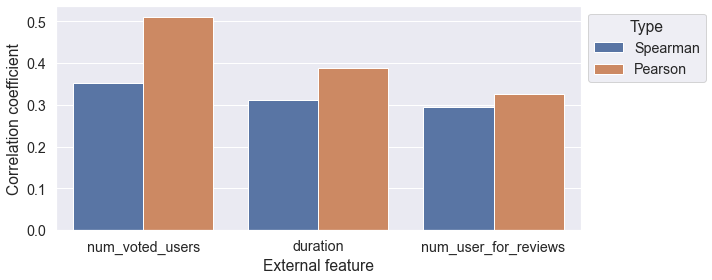

In [12]:
demo.plot_spearman_pearson()

___

## Inspect correlation between input and top-correlating features

___

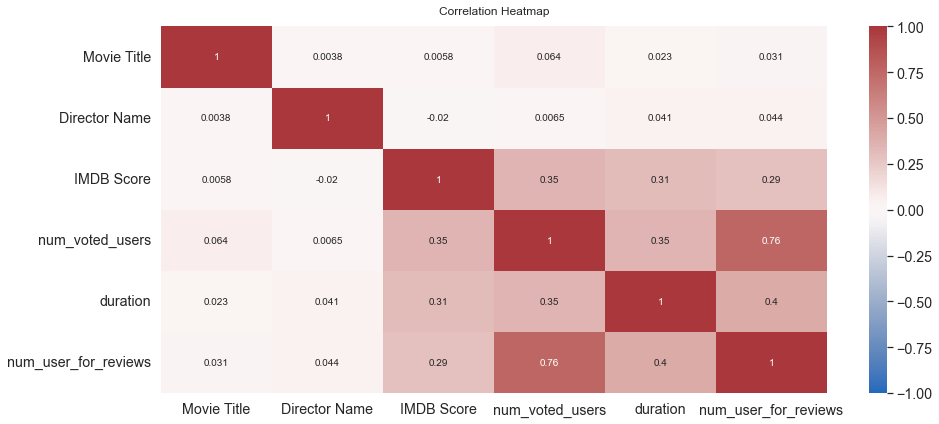

In [13]:
demo.plot_correlation_heatmap()

___

## Compare RMSE of the model trained on the input and enriched dataset

___

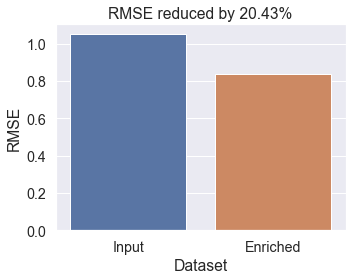

In [14]:
demo.fit_and_evaluate_model()